In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_rows = 100


### Import files and do basic statistics


In [2]:
df=pd.read_csv('PEP1.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 ### Comment
- 18 variables have missing values
- LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu, GarageType, GarageYrBlt, GarageQual, GarageCond, PoolQC, Fence,MiscFeature

In [7]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### comments
- It shows the number of missing values in each variable. 

In [8]:
df['GarageCars'].unique()

array([2, 3, 1, 0, 4])

# Select numerical and categorical variables

In [9]:
df_numerical_features = df.select_dtypes(include='number')
df_categorical_features = df.select_dtypes(include='object')

In [10]:
df_numerical_features.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
df_numerical_features.shape

(1460, 38)

In [12]:
df_categorical_features.shape

(1460, 43)

In [13]:
df_categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Comments
- There are total of 38 numerical features and 43 categorical features

# Missing value treatment


## Numerical data

In [14]:
percent_missing = df_numerical_features.isnull().sum() * 100 / len(df)
percent_missing

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
Bedroom           0.000000
Kitchen           0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

/tmp/ipykernel_483/3278200143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LotFrontage'])


<AxesSubplot: xlabel='LotFrontage', ylabel='Density'>

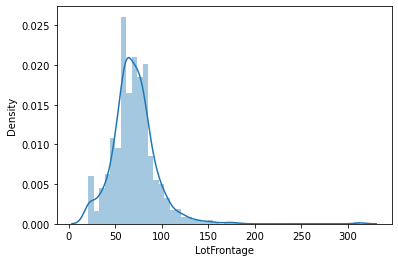

In [15]:
sns.distplot(df['LotFrontage'])

In [16]:
df_numerical_features['LotFrontage'].median()

69.0

In [17]:
df_numerical_features['LotFrontage'] = df_numerical_features.apply(
    lambda row: df_numerical_features['LotFrontage'].mean()  if pd.isnull(row['MasVnrArea']) else row['MasVnrArea'],
    axis=1
)

### Comments
- The missing values are replaced with the mean of the data

In [18]:
df_numerical_features['LotFrontage'].describe()

count    1460.000000
mean      103.500959
std       180.586195
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: LotFrontage, dtype: float64

### Comments
- LotFrontage parameter has almost 18% values as Nan. Since it cant be zero and it can also not be deleted, the values are replaced with mean

In [19]:
df_numerical_features[df_numerical_features['MasVnrArea'].isna()]



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
234,235,60,70.049958,7851,6,5,2002,2002,NaN,625,...,288,48,0,0,0,0,0,5,2010,216500
529,530,20,70.049958,32668,6,3,1957,1975,NaN,1219,...,0,0,200,0,0,0,0,3,2007,200624
650,651,60,70.049958,8125,7,6,2007,2007,NaN,0,...,0,0,0,0,0,0,0,5,2008,205950
936,937,20,70.049958,10083,7,5,2003,2003,NaN,833,...,0,41,0,0,0,0,0,8,2009,184900
973,974,20,70.049958,11639,7,5,2007,2008,NaN,0,...,0,120,0,0,0,0,0,12,2008,182000
977,978,120,70.049958,4274,7,5,2006,2007,NaN,1106,...,0,116,0,0,0,0,0,11,2007,199900
1243,1244,20,70.049958,13891,10,5,2006,2006,NaN,1386,...,216,229,0,0,0,0,0,9,2006,465000
1278,1279,60,70.049958,9473,8,5,2002,2002,NaN,804,...,0,211,0,0,0,0,0,3,2008,237000


In [20]:
df_numerical_features['MasVnrArea'].value_counts() * 100 / len(df)

0.0      58.972603
180.0     0.547945
72.0      0.547945
108.0     0.547945
120.0     0.479452
           ...    
562.0     0.068493
89.0      0.068493
921.0     0.068493
762.0     0.068493
119.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64

In [21]:
df_numerical_features['MasVnrArea'] = df_numerical_features.apply(
    lambda row: 0 if pd.isnull(row['MasVnrArea']) else row['MasVnrArea'],
    axis=1
)

### Comments
- Since 59% percent of data is 0, and 0.55% is missing,  replacing the NAn values in MassVnrArea  with 0.

In [22]:
df_numerical_features['GarageYrBlt'] = df_numerical_features.apply(
    lambda row: ['No Garage'] if pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'],
    axis=1
)

### Comments
- Looking at the garage parameters'GarageYrBlt', the parameter description says that no garage is represented as NA/ blank lines. 
- Consdiering this the NAN values of garrage is changed to No garrage. 


In [23]:
df_numerical_features.isnull().sum() 

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
Bedroom          0
Kitchen          0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## Categorical Variables

In [24]:
percent_missing = df_categorical_features.isnull().sum() * 100 / len(df)
percent_missing

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P



### Comments
- From the percentage of missing values calculated, the columns 'Alley','MiscFeature', 'Fence', 'PoolQC' have atleast 80% missing values. These columns will be dropped from the data set.

In [25]:
df_categorical_features.drop(['Alley','MiscFeature', 'Fence', 'PoolQC'], axis='columns', inplace=True)

In [26]:
df_categorical_features['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [27]:
df_categorical_features['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [28]:
df_categorical_features['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [29]:
df_categorical_features['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [30]:
df_categorical_features['BsmtExposure'].unique()


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

### comments
- The data description has NA for no basement which is misread as NAN. 
- It will be changed in the subsequent section

In [31]:
df_categorical_features['BsmtFinType2'] = df_categorical_features.apply(
    lambda row: ['No Basement'] if pd.isnull(row['BsmtFinType2']) else row['BsmtFinType2'],
    axis=1
)
df_categorical_features['BsmtFinType1'] = df_categorical_features.apply(
    lambda row: ['No Basement'] if pd.isnull(row['BsmtFinType1']) else row['BsmtFinType1'],
    axis=1
)
df_categorical_features['BsmtExposure'] = df_categorical_features.apply(
    lambda row: ['No Basement'] if pd.isnull(row['BsmtExposure']) else row['BsmtExposure'],
    axis=1
)
df_categorical_features['BsmtCond'] = df_categorical_features.apply(
    lambda row: ['No Basement'] if pd.isnull(row['BsmtCond']) else row['BsmtCond'],
    axis=1
)
df_categorical_features['BsmtQual'] = df_categorical_features.apply(
    lambda row: ['No Basement'] if pd.isnull(row['BsmtQual']) else row['BsmtQual'],
    axis=1
)

### Comments
- All the missing values due to no basement being represented as na is corrected


In [32]:
df_categorical_features['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### comments
- Electrical has only one missing value. That missing value is replaced with SBrkr as it is the most widely used electrical type.

In [33]:
df_categorical_features['Electrical'] = df_categorical_features.apply(
    lambda row: ['SBrkr'] if pd.isnull(row['Electrical']) else row['Electrical'],
    axis=1
)

### Comments
- Looking at the garage parameters ['GarageType', 'GarageYrBlt','GarageFinish',  'GarageQual', 'GarageCond' ], the parameter description says 
that no garage is represented as NA/ blank lines. In all factors  related to garage, the percent of missing is also same for all the parameters. 
- Consdiering this the NAN values of garrage is changed to No garrage. 
- Checking values using excel, the corresponding values of garrage cars and garrage area is zeros. 

In [34]:
x=df_numerical_features[df_categorical_features['GarageFinish'].isna()]
x.iloc[:,25:38]

,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
39,[No Garage],0,0,0,0,0,0,0,0,0,6,2008,82000
48,[No Garage],0,0,0,0,102,0,0,0,0,6,2009,113000
78,[No Garage],0,0,0,0,0,0,0,0,0,4,2010,136500
88,[No Garage],0,0,0,0,156,0,0,0,0,10,2009,85000
89,[No Garage],0,0,0,0,0,0,0,0,0,8,2007,123600
99,[No Garage],0,0,352,0,0,0,0,0,400,1,2010,128950
108,[No Garage],0,0,0,0,144,0,0,0,0,8,2007,115000
125,[No Garage],0,0,53,0,0,0,0,0,0,6,2006,84500
127,[No Garage],0,0,0,0,0,0,0,0,0,6,2007,87000
140,[No Garage],0,0,0,0,0,0,0,0,0,4,2010,115000


### By checking the NaN is common in all garage parameters. So our assumption that no garage is taken as NaN seems to be correct.

In [35]:
df_categorical_features['GarageType'] = df_categorical_features.apply(
    lambda row: ['No Garage'] if pd.isnull(row['GarageType']) else row['GarageType'],
    axis=1
)

df_categorical_features['GarageQual'] = df_categorical_features.apply(
    lambda row: ['No Garage'] if pd.isnull(row['GarageQual']) else row['GarageQual'],
    axis=1
)
df_categorical_features['GarageCond'] = df_categorical_features.apply(
    lambda row: ['No Garage'] if pd.isnull(row['GarageCond']) else row['GarageCond'],
    axis=1
)
df_categorical_features['GarageFinish'] = df_categorical_features.apply(
    lambda row: ['No Garage'] if pd.isnull(row['GarageFinish']) else row['GarageFinish'],
    axis=1
)


In [36]:
df_categorical_features['MasVnrType'].value_counts() * 100 / len(df)

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [37]:
df_categorical_features['MasVnrType'] = df_categorical_features.apply(
    lambda row: 'None' if pd.isnull(row['MasVnrType']) else row['MasVnrType'],
    axis=1
)

### Comments
- Since 59% percent of data is None, and 8% is missing,  replacing the NAn values in MassVnrType  with None.

In [38]:
df_categorical_features['FireplaceQu'].value_counts() * 100 / len(df)

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

In [39]:
df_categorical_features['FireplaceQu'].isna().sum()

690

In [40]:
df_categorical_features['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [41]:
check=df_categorical_features.loc[df_numerical_features['Fireplaces'] == 0, 'FireplaceQu']
check

0       NaN
5       NaN
10      NaN
12      NaN
15      NaN
       ... 
1452    NaN
1453    NaN
1454    NaN
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 690, dtype: object

In [42]:
check.shape

(690,)

### Comments
All 690 values corresponding to 0 fireplace is marked as NAN instead of no fireplace. hence the data is corrected accordingly

In [43]:
df_categorical_features['FireplaceQu'] = df_categorical_features.apply(
    lambda row: 'No Fireplace' if pd.isnull(row['FireplaceQu']) else row['FireplaceQu'],
    axis=1
)

In [44]:
percent_missing = df_categorical_features.isnull().sum() * 100 / len(df)
percent_missing

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

In [45]:
df2=pd.concat([df_numerical_features, df_categorical_features])

### Comments
- The data frame is concated to have treated data

In [46]:
df2.isnull().sum()


Id               1460
MSSubClass       1460
LotFrontage      1460
LotArea          1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
MasVnrArea       1460
BsmtFinSF1       1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFinSF     1460
GrLivArea        1460
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
Bedroom          1460
Kitchen          1460
TotRmsAbvGrd     1460
Fireplaces       1460
GarageYrBlt      1460
GarageCars       1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
MoSold           1460
YrSold           1460
SalePrice        1460
MSZoning         1460
Street           1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborho

In [47]:
correlation_matrix=df2.corr()

x=correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']>0.4)]


/tmp/ipykernel_483/3677858934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df2.corr()


In [48]:
x.index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [49]:
key_factors=df2[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice']]


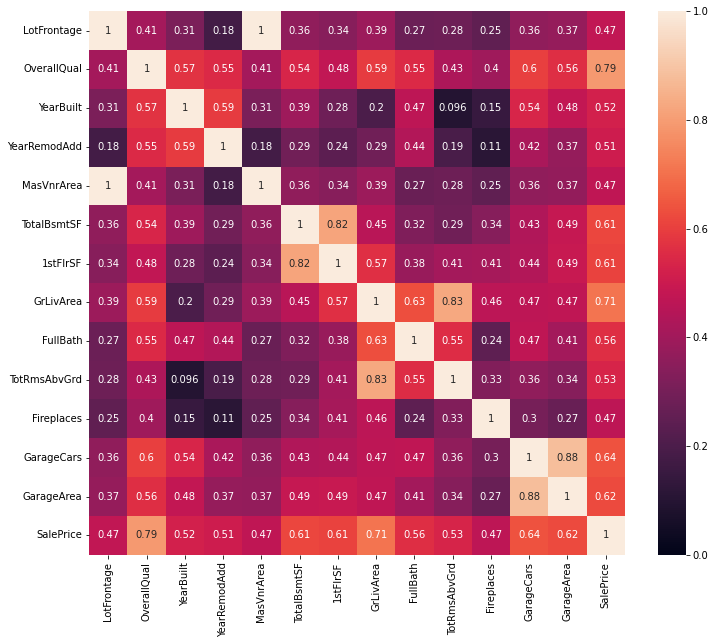

In [50]:
plt.figure(figsize=(12, 10))
heat_map=sns.heatmap(abs(key_factors.corr()),vmin=0, vmax=1,annot=True)

### Comments
- The target variable 'SalePrice' is highly correlated with OverallQual of the house, Garage Cars, Garage area, TotRmsabovgrnd, TotalBsmSF, 1stflrSF,Yearbuilt and remodelled, MasVnrArea and Fullbath
- Graphs are only drawn for these variables. 

In [51]:
key_factors.skew()


LotFrontage     2.678683
OverallQual     0.216944
YearBuilt      -0.613461
YearRemodAdd   -0.503562
MasVnrArea      2.677616
TotalBsmtSF     1.524255
1stFlrSF        1.376757
GrLivArea       1.366560
FullBath        0.036562
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageCars     -0.342549
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

### Comments
- From the skewness value YearRemodAdd, FullBath, GarageCars, GarageArea, OverallQual are centrally distributed.
- LotFrontage, MasvnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, TotRmsAbvGrd, Fireplaces, Saleprice are positively skewed.
- Yearbuilt is negatively skewed.


In [52]:
key_factors.describe()[['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces','SalePrice']]

,LotFrontage,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,103.500959,103.117123,1057.429452,1162.626712,1515.463699,6.517808,0.613014,180921.195890
std,180.586195,180.731373,438.705324,386.587738,525.480383,1.625393,0.644666,79442.502883
min,0.000000,0.000000,0.000000,334.000000,334.000000,2.000000,0.000000,34900.000000
25%,0.000000,0.000000,795.750000,882.000000,1129.500000,5.000000,0.000000,129975.000000
50%,0.000000,0.000000,991.500000,1087.000000,1464.000000,6.000000,1.000000,163000.000000
75%,164.250000,164.250000,1298.250000,1391.250000,1776.750000,7.000000,1.000000,214000.000000
max,1600.000000,1600.000000,6110.000000,4692.000000,5642.000000,14.000000,3.000000,755000.000000


### Comments
- All the positively skewed variables have outliers as the maximum values are way higher than the mean values. 

In [53]:
key_factors.describe()[['YearBuilt']]

,YearBuilt
count,1460.000000
mean,1971.267808
std,30.202904
min,1872.000000
25%,1954.000000
50%,1973.000000
75%,2000.000000
max,2010.000000


/tmp/ipykernel_483/322547345.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(key_factors['YearBuilt'])


<AxesSubplot: xlabel='YearBuilt', ylabel='Density'>

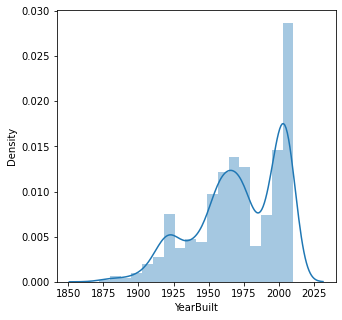

In [54]:
plt.figure(figsize=(5, 5))
sns.distplot(key_factors['YearBuilt'])

### Comments
 - The distribution plot clearly shows negatively skewed data that do not follow normal distribution

/tmp/ipykernel_483/721227035.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(key_factors['SalePrice'])


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

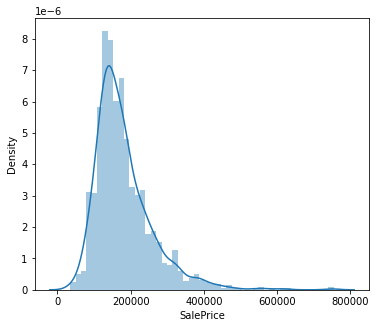

In [55]:
plt.figure(figsize= (6,5))
sns.distplot(key_factors['SalePrice'])

### Comments
- The SalePrice itself is rightly skewed

<AxesSubplot: >

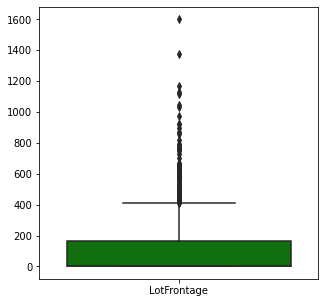

In [56]:
plt.figure(figsize=(5, 5))
sns.boxplot(key_factors[['LotFrontage']], color='green')

<AxesSubplot: >

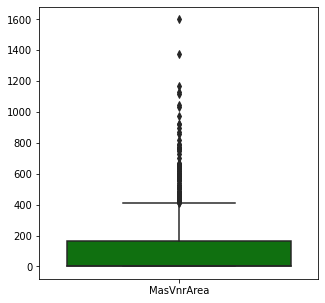

In [57]:
plt.figure(figsize=(5, 5))
sns.boxplot(key_factors[['MasVnrArea']],color='green')


<AxesSubplot: >

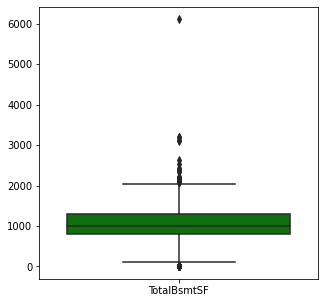

In [58]:
plt.figure(figsize=(5, 5))
sns.boxplot(key_factors[['TotalBsmtSF']],color='green')

<AxesSubplot: >

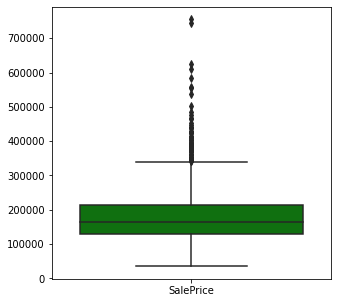

In [59]:
plt.figure(figsize=(5, 5))
sns.boxplot(key_factors[['SalePrice']],color='green') 


<AxesSubplot: >

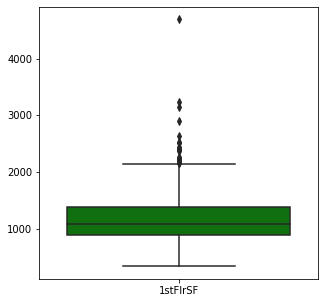

In [60]:
plt.figure(figsize=(5, 5))
sns.boxplot(key_factors[['1stFlrSF']],color='green') 

In [61]:
def find_outliers_IQR(df):  #identifies and returns outlier using Inter quantile range. Since data is skewed IQR is used

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


In [62]:
outliers = find_outliers_IQR(key_factors[['LotFrontage']])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value:'+ str(outliers.max()))

print('min outlier value:'+ str(outliers.min()))

number of outliers: 2920
max outlier value:LotFrontage    1600.0
dtype: float64
min outlier value:LotFrontage    412.0
dtype: float64


### Comments
- Using the function find_outliers_IQR we can easily identify the outliers present in any data

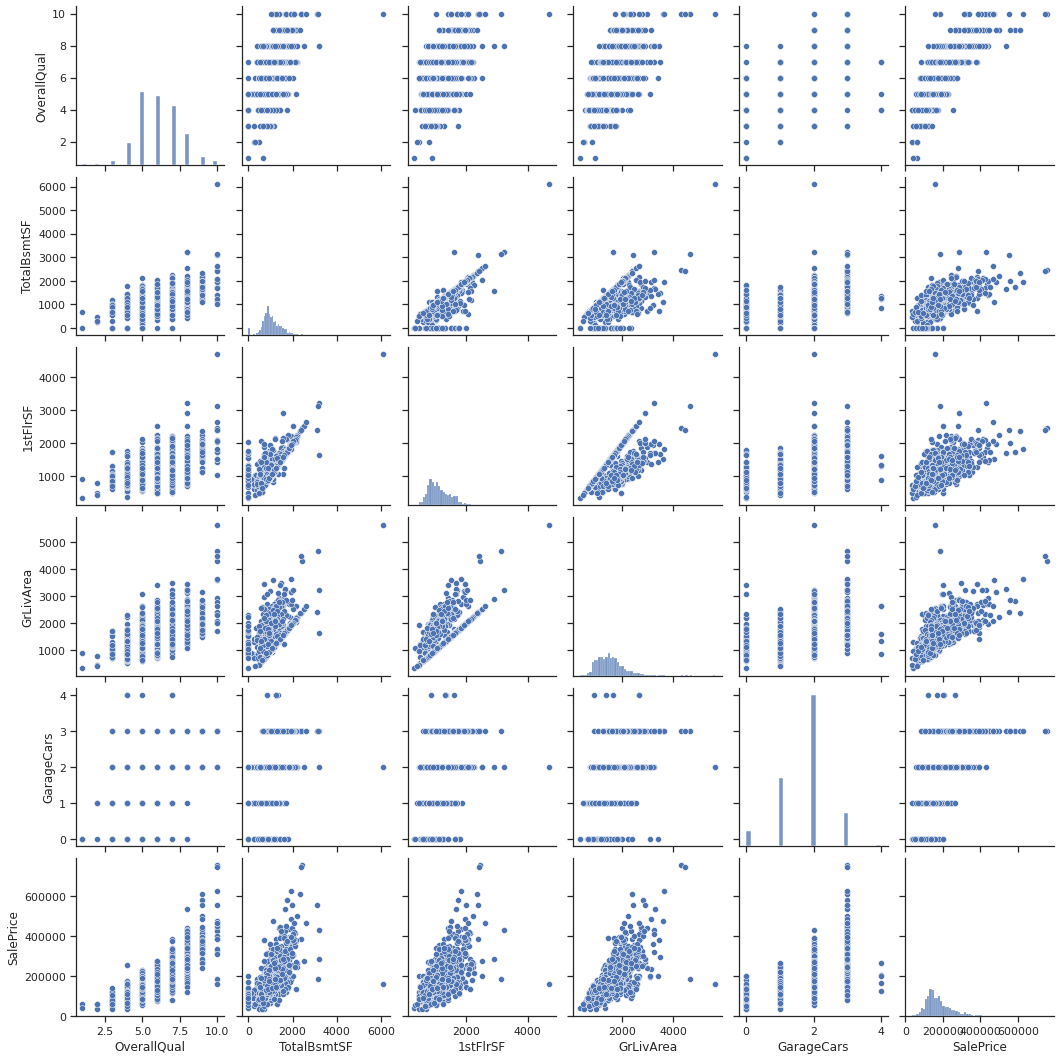

In [63]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(key_factors[['OverallQual','TotalBsmtSF', '1stFlrSF','GrLivArea', 'GarageCars', 'SalePrice']])
plt.show()

### Comments
- Pairplot shows that Saleprice is dependant on overall quality. Most of high selling price have quality of 7.5 and above.
- Also people prefer properties with Garage space to have 2 or 3 cars. 

Almost all key variables are numerical or one hot encoded variables. So Overall quality is taken here to do a pairplot to understand the data

<AxesSubplot: xlabel='OverallQual', ylabel='SalePrice'>

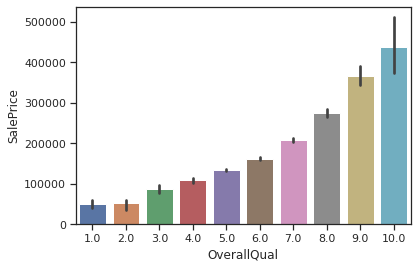

In [64]:
sns.barplot(x='OverallQual',y='SalePrice',data=key_factors)

### Comments
-The overall quality affects the SalePrice
-higher qualtity houses have been sold for higher prices

/tmp/ipykernel_483/2887241429.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(key_factors['TotalBsmtSF'])


<AxesSubplot: xlabel='TotalBsmtSF', ylabel='Density'>

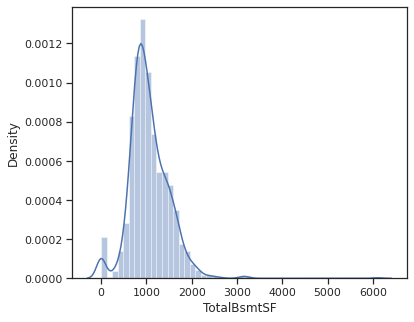

In [65]:
plt.figure(figsize= (6,5))
sns.distplot(key_factors['TotalBsmtSF'])

### Comments
- The distribution plot shows that 750-1250 sq ft basement area is the most sorted options

/tmp/ipykernel_483/1345077718.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(key_factors['1stFlrSF'])


<AxesSubplot: xlabel='1stFlrSF', ylabel='Density'>

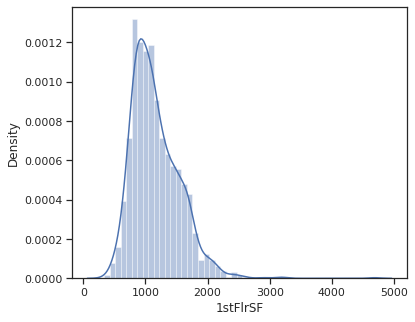

In [66]:
plt.figure(figsize= (6,5))
sns.distplot(key_factors['1stFlrSF'])


/tmp/ipykernel_483/1978793223.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(key_factors['GrLivArea'])


<AxesSubplot: xlabel='GrLivArea', ylabel='Density'>

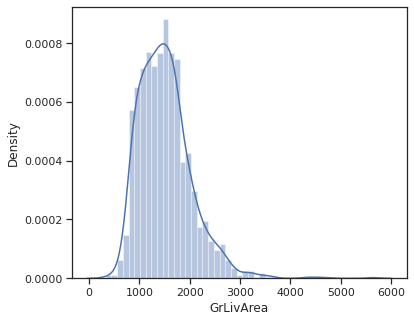

In [67]:
plt.figure(figsize= (6,5))
sns.distplot(key_factors['GrLivArea'])

<AxesSubplot: xlabel='GarageCars', ylabel='SalePrice'>

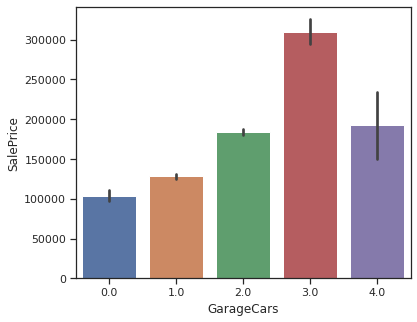

In [68]:
plt.figure(figsize= (6,5))
sns.barplot(x='GarageCars',y='SalePrice',data=key_factors)

### Comments
- The properties with 3 garage car parking space is the highest selling property in iowa.
- Garage space with 0 car parking is the least prefered option